<a href="https://colab.research.google.com/github/rileykc98/478Project/blob/main/478Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras import backend

import matplotlib.pyplot as plt
import numpy as np



In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Label: 1


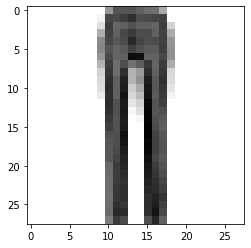

In [3]:
sample = 69
sample_image = x_train[sample]
plt.imshow(sample_image, cmap = "gray_r")
print("Label: {}".format(y_train[sample]))

In [4]:
# hyper parameters
epochs = 10
num_classes = 10
batch_size = 256

# normalize and reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one hot labels
y_train = tf.utils.to_categorical(y_train, num_classes)
y_test = tf.utils.to_categorical(y_test, num_classes)


In [16]:
# define model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               1179776   
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                      

In [18]:
test_history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs,
          verbose=2,
          validation_data=(x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Loss: {}".format(score[0]))
print("Accuracy: {}".format(score[1]))
print(test_history)

Epoch 1/10
235/235 - 7s - loss: 0.0579 - accuracy: 0.9811 - val_loss: 0.2706 - val_accuracy: 0.9173 - 7s/epoch - 31ms/step
Epoch 2/10
235/235 - 7s - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.2759 - val_accuracy: 0.9189 - 7s/epoch - 29ms/step
Epoch 3/10
235/235 - 7s - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.2991 - val_accuracy: 0.9182 - 7s/epoch - 30ms/step
Epoch 4/10
235/235 - 7s - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.3148 - val_accuracy: 0.9206 - 7s/epoch - 30ms/step
Epoch 5/10
235/235 - 7s - loss: 0.0179 - accuracy: 0.9955 - val_loss: 0.3221 - val_accuracy: 0.9217 - 7s/epoch - 29ms/step
Epoch 6/10
235/235 - 7s - loss: 0.0161 - accuracy: 0.9953 - val_loss: 0.3624 - val_accuracy: 0.9222 - 7s/epoch - 30ms/step
Epoch 7/10
235/235 - 7s - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.3516 - val_accuracy: 0.9191 - 7s/epoch - 29ms/step
Epoch 8/10
235/235 - 7s - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.3821 - val_accuracy: 0.9186 - 7s/epoch - 29ms/step
Epoch 9/10
235/2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


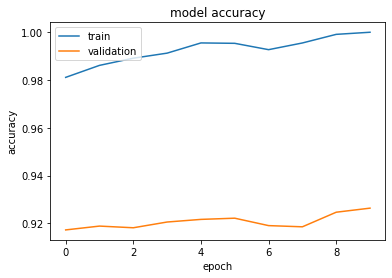

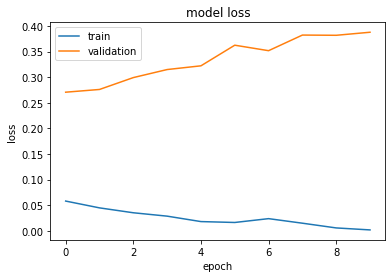

In [20]:
print(test_history.history.keys())
#  "Accuracy"
plt.plot(test_history.history['accuracy'])
plt.plot(test_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(test_history.history['loss'])
plt.plot(test_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()